___
# Ciência dos Dados - PROJETO 2

___
## Pedro Henrique Daher

## Pedro Henrique Lopes

___

___

## 1. Problema

O Classificador Naive-Bayes, o qual se baseia no uso do teorema de Bayes, é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser SPAM considerando as palavras em seu conteúdo e, de forma complementar, permite calcular a probabilidade de uma mensagem ser HAM dada as palavras descritas na mensagem.

Para realizar o MVP (minimum viable product) do projeto, você precisa programar uma versão do classificador que "aprende" o que é uma mensagem SPAM considerando uma base de treinamento e comparar o desempenho dos resultados com uma base de testes. 


___
## 2. Separação da base de dados em Treinamento e Teste

A base de dados deve ser separada em duas partes, aleatoriamente, considerando: 
    
    75% dos dados para a parte Treinamento; e
    25% dos dados para a parte Teste.

In [2]:
import pandas as pd
import os
import math
import json
from random import shuffle
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Pedro Daher\Downloads


In [4]:
df=pd.read_excel("spamhamV2.xlsx")
df.shape

#75% = 4180 
#25%= 1394

(5572, 2)

In [5]:
#Utilizando iloc, separei as duas bases de dados em Treinamento 75% e Teste 25%

treinamento=df.sample(frac = 0.75, replace = False).reset_index()
teste = df.sample(frac = 0.25, replace = False).reset_index()

#treinamento=df.iloc[0:4180,0:2]
#teste=df.iloc[4181:5572,0:2]

___
## 3. Classificador Naive-Bayes

Limpeza, correções e mais implementações nas bases de dados

In [6]:
#Removendo as impurezas:
def CleanString (s):
    s=s.replace(","," ")
    s=s.replace("$"," ")
    s=s.replace("+"," ")
    s=s.replace("-"," ")
    s=s.replace("="," ")
    s=s.replace("%"," ")
    s=s.replace("*"," ")
    s=s.replace("/"," ")
    s=s.replace("/n"," ")
    s=s.replace(":"," ")
    s=s.replace("("," ")
    s=s.replace(")"," ")
    s=s.replace("~"," ")
    s=s.replace("["," ")
    s=s.replace("]"," ")
    s=s.replace("."," ")
    s=s.replace(";"," ")
    s=s.replace("_"," ")
    s=s.replace("@"," ")
    s=s.replace("  "," ")
    s=s.replace("?"," ")
    s=s.replace("!"," ")
    return(s)

In [7]:
#Mais algumas implementações necessárias
treinamento["Email"] = CleanString(treinamento.Email)
treinamento["Email"] = treinamento.Email.str.lower()
treinamento["Email"] = treinamento.Email.str.split()

In [8]:
#Separação das bases de treinamento em duas distinatas, treinamento Ham e treinamento Spam
TreinamentoSpam=treinamento[treinamento.Class=="spam"]
TreinamentoHam=treinamento[treinamento.Class=="ham"]

In [9]:
#Conferindo quantos elementos possuem nas seguintes bases de dados
TotalTreinHam = len(TreinamentoHam)
TotalTreinSpam = len(TreinamentoSpam)
TotalTrein = len(treinamento)

Calculo das probabilidades marginais e condicionais necessárias para classificar uma nova mensagem

In [10]:
#Calcule a probabilidades marginais e condicionais necessárias para classificar uma nova mensagem. Ou seja, calcule:
#P(Spam)= Probabilidade da msg ser Spam
ProbSpam = TotalTreinSpam/TotalTrein
ProbSpam

0.13448193347690834

In [11]:
#Probabilidade de ser Ham
ProbHam= 1 - ProbSpam
ProbHam

0.8655180665230917

In [12]:
#Probabilidade de uma palavra acontecer se a mensagem for Spam ou Ham
#Se quiser Spam utilizar DicSpam, se quiser Ham utilizar DicHam
def ProbWord(word, Dic, Total):
    if word in Dic:
        value=Dic[word]
    else:
        value=0
    return((value+1)/(Total)) 

In [13]:
#Classificando uma mensagem na base de testes
def ProbMsg(msg, Dic, Total):
    msg = CleanString(msg)
    msg = msg.lower()
    p = 1
    for w in msg.split():
        p = p*ProbWord(w, Dic, Total)
    return (p) 

In [14]:
#Quando deveremos considerar a mensagem Spam
def ConsiderSpam(msg, cut, DicS, DicH, ProbS, ProbH, TotalS, TotalH):
    wSpam=ProbS*ProbMsg(msg, DicS, TotalS)
    wHam=ProbH*ProbMsg(msg, DicH, TotalH)
    if wSpam*(1-cut)> wHam*cut:
        return True
    else:
        return False 

Na celula a seguir, uma serie de comandos serão utilizados, mas não necessariamente eles irão responder apenas as perguntas do intem 3.4 (o item em sequencia que será respondido), os comandos servirão também para perguntas posteriores do item 5 "Qualidade do classificador". 

In [15]:
def Classifier(printstats, cut, lstPPV, lstPNV, lstSENS, lstSPEC ):
    treinamento=df.sample(frac = 0.75, replace = False).reset_index()
    teste = df.sample(frac = 0.25, replace = False).reset_index()

    treinamento["Email"] = CleanString(treinamento.Email)
    treinamento["Email"] = treinamento.Email.str.lower()
    treinamento["Email"] = treinamento.Email.str.split()
    
    TreinamentoSpam=treinamento[treinamento.Class=="spam"]
    TreinamentoHam=treinamento[treinamento.Class=="ham"]
    
    TotalTrein = len(treinamento)
    TotalTreinSpam = len(TreinamentoSpam)
    TotalTreinHam = len(TreinamentoHam)
    
    ProbSpam = TotalTreinSpam/TotalTrein
    ProbHam= 1 - ProbSpam
    
    #Dicionário total 
    DicTotal={}
    for email in treinamento.Email:
        for word in email:
            if word in DicTotal:
                DicTotal[word] +=1
            else:
                DicTotal[word]=1
    
    #Dicionário Spam
    DicSpam={}
    for email in TreinamentoSpam.Email:
        for word in email:
            if word in DicSpam:
                DicSpam[word] +=1
            else:
                DicSpam[word]=1  
    
    #Dicionário Ham
    DicHam={}
    for email in TreinamentoHam.Email:
        for word in email:
            if word in DicHam:
                DicHam[word] +=1
            else:
                DicHam[word]=1  
    
    #Total no dicionário Spam
    TotalDicSpam=0
    for w in DicSpam:
        TotalDicSpam += DicSpam[w]
    
    #Total no dicionário Ham
    TotalDicHam=0
    for w in DicHam:
        TotalDicHam += DicHam[w]
    
    TesteSpam=teste[teste.Class=="spam"]
    TesteHam=teste[teste.Class=="ham"]
    P = len(TesteSpam)
    N = len(TesteHam)         
    
    #Valores iniciais das variáveis    
    VP=0
    FN=0
    FP=0
    VN=0
    
    #Adicionando os valores nas variáveis
    for mail in TesteSpam.Email:
        if ConsiderSpam(mail, cut, DicSpam, DicHam, ProbSpam, ProbHam, TotalDicSpam + len(DicTotal), TotalDicHam + len(DicTotal)):
            VP += 1
        else:
            FN += 1
        
    #Adicionando os valores nas variáveis
    for mail in TesteHam.Email:
        if ConsiderSpam(mail, cut, DicSpam, DicHam, ProbSpam, ProbHam, TotalDicSpam + len(DicTotal), TotalDicHam + len(DicTotal)):
            FP += 1
        else:
            VN += 1
            
    ACC=(VP+VN)/(P+N)
    SENS=VP/(VP+FN)
    SPEC=VN/(VN+FP)
    EFF=(SENS+SPEC)/2
    PPV=VP/(VP+FP)
    NPV=VN/(VN+FN)
    MCC = (VP*VN - FP*FN) / math.sqrt((VP + FP)*(VP + FN)*(VN + FP)*(VN + FN))
               
    lstPPV.append(VP/(P+N))
    lstPNV.append(VN/(P+N))  
    lstSENS.append(SENS)
    lstSPEC.append(SPEC)
        
    if printstats:
        print("% de Falsos Positivos:", FP/(P+N))
        print("% de Positivos Verdadeiros:", VP/(P+N))
        print("% de Falsos Negativos:", FN/(P+N))
        print("% de Negativos Verdadeiros:", VN/(P+N))
        print("Acurácia (ACC):",ACC)
        print(" ")
        print("Sensibilidade (SENS):",SENS)
        print("Especificidade (SPEC):", SPEC)
        print("Eficiência (EFF):", EFF)
        print("Preditividade Positiva (PPV):",PPV)
        print("Preditividade Negativa (NPV):",NPV)
        print("Coeficiente de Correlação de Matthews - MCC (φ):", MCC)
        

Testando o classificador e extraindo as seguintes medidas: (item 3.4)

In [16]:
PPV=[]
PNV=[]
SENS=[]
SPEC=[]

Classifier(True, 0.5, PPV, PNV, SENS, SPEC)

% de Falsos Positivos: 0.007896625987078248
% de Positivos Verdadeiros: 0.12132089016511127
% de Falsos Negativos: 0.008614501076812634
% de Negativos Verdadeiros: 0.8621679827709978
Acurácia (ACC): 0.9834888729361091
 
Sensibilidade (SENS): 0.9337016574585635
Especificidade (SPEC): 0.990924092409241
Eficiência (EFF): 0.9623128749339023
Preditividade Positiva (PPV): 0.9388888888888889
Preditividade Negativa (NPV): 0.9901071723000825
Coeficiente de Correlação de Matthews - MCC (φ): 0.9268083295380385


Qualidade do meu classificador:

Resposta: Os falsos negativos e falsos positivos apresentam resultados bem baixos, mostrando que os resultados estão com esperados, com isso o classificador possui uma boa qualidade.

___
## 4. Curva ROC

A curva ROC possui um ponto de corte variado (phi), para saber exatamente onde devemos considerar SPAM e onde devemos considerar HAM, para obtermos melhores resultados.

In [32]:
PPV=[]
PNV=[]
SENS=[]
SPEC=[]
for cut in np.arange(0,1,0.01):
    Classifier(False, cut, PPV, PNV, SENS, SPEC)

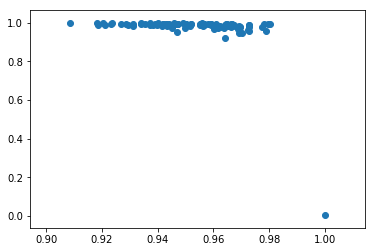

In [33]:
plt.scatter(SENS,SPEC)
plt.show()

___
## 5. Qualidade do Classificador alterando a base de treinamento

Como explicado anteriormente, a resolução de tal problema foi implementada nas celulas acima (item 3), e os resultados serão mostrados abaixo.

In [29]:
PPV=[]
PNV=[]
SENS=[]
SPEC=[]

#Repetindo 10000 vezes
for i in range(10000):
    Classifier(False, 0.5, PPV, PNV, SENS, SPEC)

Histograma com percentuais de acerto

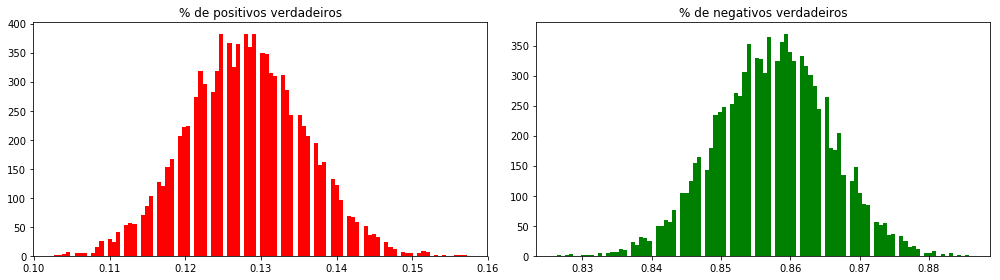

In [30]:
fig=plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(PPV, bins=100,color="red")
plt.title("% de positivos verdadeiros")

plt.subplot(122)
plt.hist(PNV,bins=100,color="green")
plt.title("% de negativos verdadeiros")

plt.tight_layout()
plt.show()

Discussão do resultado

Repetindo nosso dataframe com valores sortidos 10.000 vezes, os gráficos começam a demonstrar resultados bem melhores, assim como esperados para os falsos positivos e falsos negativos (demonstrados no Histograma).